# Machine Learning, August 2018, Problem Set 1

## Linear regression

This assignment will introduce you to Python, basic data manipulation with numpy, and linear regression. Consider the height/age/weight data in the cell below.


In [47]:

import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

height = np.array([ 155.0, 146.0, 142.0, 150.0, 172.0, 161.0, 180.0, 130.0, 158.0, 161.0, 183.0, 158.0, 153.0, 164.0, 180.0, 154.0, 170.0, 148.0, 179.0, 144.0, 182.0, 161.0, 164.0, 156.0, 160.0, 163.0, 161.0, 165.0, 162.0, 144.0, 160.0, 162.0, 177.0, 166.0, 162.0, 165.0, 153.0, 185.0, 157.0, 168.0, 152.0, 173.0, 136.0, 169.0, 163.0, 142.0, 156.0, 152.0, 129.0, 162.0, 151.0, 186.0, 169.0, 161.0, 167.0, 136.0, 133.0, 192.0, 166.0, 168.0, 146.0, 127.0, 160.0, 161.0, 150.0, 149.0, 204.0, 170.0, 151.0, 164.0, 162.0, 161.0, 193.0, 156.0, 115.0, 161.0, 149.0, 165.0, 172.0, 173.0, 156.0, 167.0, 177.0, 137.0, 153.0, 166.0, 144.0, 165.0, 148.0, 177.0, 162.0, 150.0, 143.0, 161.0, 147.0, 177.0, 157.0, 170.0, 132.0, 173.0, 177.0, 179.0, 160.0, 164.0, 171.0, 140.0, 163.0, 136.0, 155.0, 174.0, 160.0, 133.0, 177.0, 159.0, 156.0, 166.0, 129.0, 123.0, 136.0, 148.0, 167.0, 158.0, 161.0, 134.0, 164.0, 156.0, 162.0, 147.0, 183.0, 169.0, 167.0, 193.0, 146.0, 178.0, 169.0, 169.0, 159.0, 140.0, 153.0, 164.0, 191.0, 173.0, 132.0, 164.0, 144.0, 154.0, 179.0, 177.0, 160.0, 187.0 ])
age = np.array([ 8.0, 51.0, 29.0, 27.0, 36.0, 30.0, 51.0, 50.0, 36.0, 32.0, 41.0, 18.0, 42.0, 38.0, 30.0, 28.0, 34.0, 45.0, 33.0, 24.0, 29.0, 52.0, 39.0, 47.0, 40.0, 38.0, 20.0, 40.0, 43.0, 23.0, 35.0, 35.0, 56.0, 39.0, 41.0, 24.0, 32.0, 32.0, 54.0, 33.0, 27.0, 19.0, 34.0, 35.0, 44.0, 44.0, 47.0, 32.0, 50.0, 35.0, 25.0, 39.0, 38.0, 40.0, 13.0, 48.0, 39.0, 31.0, 37.0, 44.0, 44.0, 44.0, 41.0, 39.0, 19.0, 38.0, 50.0, 31.0, 43.0, 38.0, 26.0, 39.0, 42.0, 38.0, 38.0, 32.0, 36.0, 35.0, 35.0, 39.0, 30.0, 34.0, 40.0, 46.0, 33.0, 36.0, 52.0, 41.0, 28.0, 45.0, 47.0, 9.0, 47.0, 43.0, 34.0, 36.0, 50.0, 43.0, 52.0, 30.0, 33.0, 34.0, 28.0, 49.0, 53.0, 21.0, 32.0, 50.0, 59.0, 19.0, 40.0, 30.0, 35.0, 35.0, 22.0, 51.0, 31.0, 41.0, 39.0, 40.0, 30.0, 45.0, 43.0, 34.0, 26.0, 28.0, 43.0, 30.0, 35.0, 47.0, 19.0, 61.0, 28.0, 39.0, 48.0, 30.0, 43.0, 28.0, 42.0, 58.0, 33.0, 24.0, 12.0, 34.0, 31.0, 36.0, 31.0, 21.0, 43.0, 33.0 ])
weight = np.array([ 47.0, 61.0, 55.0, 42.0, 65.0, 61.0, 67.0, 32.0, 60.0, 62.0, 69.0, 58.0, 65.0, 68.0, 74.0, 54.0, 65.0, 55.0, 70.0, 51.0, 74.0, 69.0, 66.0, 57.0, 51.0, 64.0, 55.0, 68.0, 64.0, 59.0, 57.0, 58.0, 74.0, 57.0, 64.0, 52.0, 48.0, 75.0, 61.0, 56.0, 53.0, 50.0, 49.0, 56.0, 61.0, 60.0, 67.0, 58.0, 53.0, 54.0, 49.0, 78.0, 59.0, 60.0, 66.0, 43.0, 43.0, 73.0, 70.0, 76.0, 61.0, 47.0, 61.0, 66.0, 50.0, 62.0, 89.0, 66.0, 59.0, 55.0, 60.0, 59.0, 78.0, 57.0, 31.0, 58.0, 52.0, 60.0, 64.0, 60.0, 58.0, 72.0, 69.0, 46.0, 54.0, 67.0, 65.0, 46.0, 56.0, 74.0, 56.0, 49.0, 53.0, 66.0, 57.0, 68.0, 64.0, 66.0, 45.0, 63.0, 64.0, 65.0, 57.0, 67.0, 69.0, 46.0, 60.0, 50.0, 57.0, 62.0, 51.0, 47.0, 74.0, 62.0, 52.0, 72.0, 43.0, 45.0, 48.0, 59.0, 66.0, 58.0, 67.0, 48.0, 65.0, 57.0, 64.0, 49.0, 78.0, 61.0, 59.0, 93.0, 42.0, 77.0, 63.0, 72.0, 57.0, 36.0, 53.0, 64.0, 73.0, 65.0, 38.0, 60.0, 54.0, 47.0, 65.0, 59.0, 54.0, 64.0 ])


## Problem 1

Make two plots from the height/age/weight data: one plotting height against weight, and another plotting age against weight. Would these two variables be useful in predicting weight?


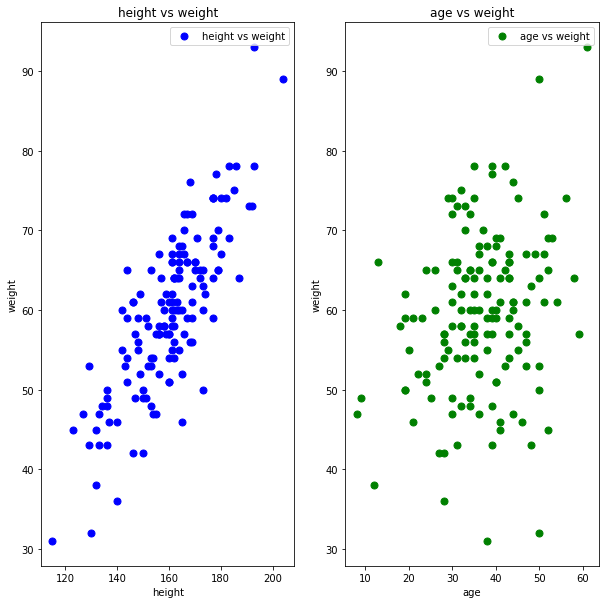

In [48]:
# Put your plotting code here and show the result.

fig,ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(height, weight ,'bo', markersize = 7,  label = "height vs weight")
ax1.set_title('height vs weight')
ax1.set_xlabel('height')
ax1.set_ylabel('weight')
ax1.legend()

ax2.plot(age, weight , 'go', markersize = 7, label = "age vs weight")
ax2.set_title('age vs weight')
ax2.set_xlabel('age')
ax2.set_ylabel('weight')
ax2.legend()
plt.show()


The graphs show height Vs weight and age Vs weight respectively. It is clear from graph 1 that weight can be predicted from heights. The points follow normal distribution( weight increases with height). 
The second graph - age vs weight is also a normal distribution but more scattered and random.
However, both the measures (height and age) can be used to predict weight of a person.

## Problem 2

Make three linear regression models: one predicting weight from height, one predicting weight from age, and one predicting weight from both height and age. Report the mean squared error for each of the three models. For each model, make a scatter plot showing predicted vs. actual weight.


case 1: predicting weight from height 

theta : [[-25.14601758]
 [  0.52987376]]


predicted weights:  [[56.98441521 52.21555137 50.09605633 54.33504641 65.99226913 60.16365777
  70.23125921 43.73757121 58.57403649 60.16365777 71.82088049 58.57403649
  55.92466769 61.75327905 70.23125921 56.45454145 64.93252161 53.27529889
  69.70138545 51.15580385 71.29100673 60.16365777 61.75327905 57.51428897
  59.63378401 61.22340529 60.16365777 62.28315281 60.69353153 51.15580385
  59.63378401 60.69353153 68.64163793 62.81302657 60.69353153 62.28315281
  55.92466769 72.88062801 58.04416273 63.87277409 55.39479393 66.52214289
  46.91681377 64.40264785 61.22340529 50.09605633 57.51428897 55.39479393
  43.20769745 60.69353153 54.86492017 73.41050177 64.40264785 60.16365777
  63.34290033 46.91681377 45.32719249 76.58974433 62.81302657 63.87277409
  52.21555137 42.14794993 59.63378401 60.16365777 54.33504641 53.80517265
  82.94822945 64.93252161 54.86492017 61.75327905 60.69353153 60.16365777
  77.1196

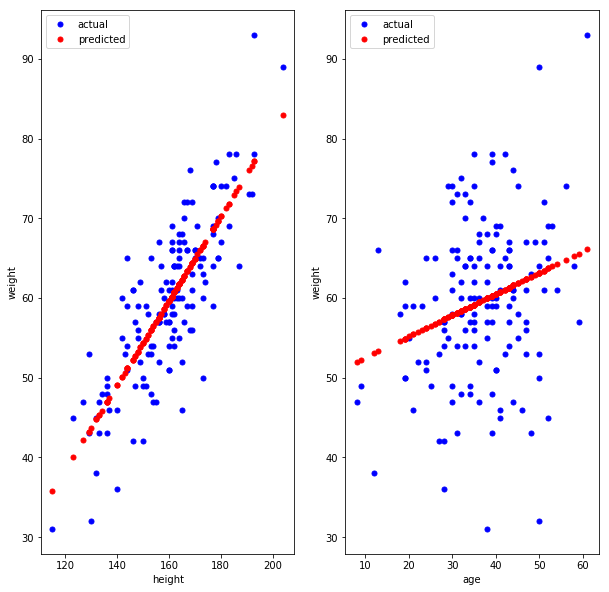

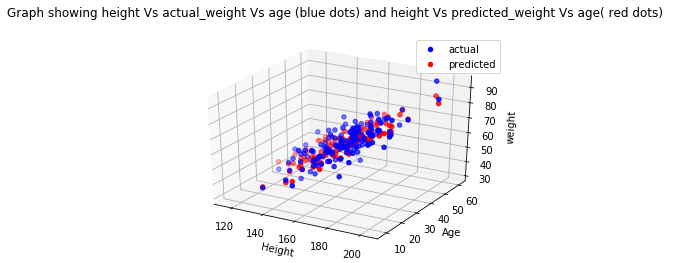

In [49]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

height = np.array([ 155.0, 146.0, 142.0, 150.0, 172.0, 161.0, 180.0, 130.0, 158.0, 161.0, 183.0, 158.0, 153.0, 164.0, 180.0, 154.0, 170.0, 148.0, 179.0, 144.0, 182.0, 161.0, 164.0, 156.0, 160.0, 163.0, 161.0, 165.0, 162.0, 144.0, 160.0, 162.0, 177.0, 166.0, 162.0, 165.0, 153.0, 185.0, 157.0, 168.0, 152.0, 173.0, 136.0, 169.0, 163.0, 142.0, 156.0, 152.0, 129.0, 162.0, 151.0, 186.0, 169.0, 161.0, 167.0, 136.0, 133.0, 192.0, 166.0, 168.0, 146.0, 127.0, 160.0, 161.0, 150.0, 149.0, 204.0, 170.0, 151.0, 164.0, 162.0, 161.0, 193.0, 156.0, 115.0, 161.0, 149.0, 165.0, 172.0, 173.0, 156.0, 167.0, 177.0, 137.0, 153.0, 166.0, 144.0, 165.0, 148.0, 177.0, 162.0, 150.0, 143.0, 161.0, 147.0, 177.0, 157.0, 170.0, 132.0, 173.0, 177.0, 179.0, 160.0, 164.0, 171.0, 140.0, 163.0, 136.0, 155.0, 174.0, 160.0, 133.0, 177.0, 159.0, 156.0, 166.0, 129.0, 123.0, 136.0, 148.0, 167.0, 158.0, 161.0, 134.0, 164.0, 156.0, 162.0, 147.0, 183.0, 169.0, 167.0, 193.0, 146.0, 178.0, 169.0, 169.0, 159.0, 140.0, 153.0, 164.0, 191.0, 173.0, 132.0, 164.0, 144.0, 154.0, 179.0, 177.0, 160.0, 187.0 ])
age = np.array([ 8.0, 51.0, 29.0, 27.0, 36.0, 30.0, 51.0, 50.0, 36.0, 32.0, 41.0, 18.0, 42.0, 38.0, 30.0, 28.0, 34.0, 45.0, 33.0, 24.0, 29.0, 52.0, 39.0, 47.0, 40.0, 38.0, 20.0, 40.0, 43.0, 23.0, 35.0, 35.0, 56.0, 39.0, 41.0, 24.0, 32.0, 32.0, 54.0, 33.0, 27.0, 19.0, 34.0, 35.0, 44.0, 44.0, 47.0, 32.0, 50.0, 35.0, 25.0, 39.0, 38.0, 40.0, 13.0, 48.0, 39.0, 31.0, 37.0, 44.0, 44.0, 44.0, 41.0, 39.0, 19.0, 38.0, 50.0, 31.0, 43.0, 38.0, 26.0, 39.0, 42.0, 38.0, 38.0, 32.0, 36.0, 35.0, 35.0, 39.0, 30.0, 34.0, 40.0, 46.0, 33.0, 36.0, 52.0, 41.0, 28.0, 45.0, 47.0, 9.0, 47.0, 43.0, 34.0, 36.0, 50.0, 43.0, 52.0, 30.0, 33.0, 34.0, 28.0, 49.0, 53.0, 21.0, 32.0, 50.0, 59.0, 19.0, 40.0, 30.0, 35.0, 35.0, 22.0, 51.0, 31.0, 41.0, 39.0, 40.0, 30.0, 45.0, 43.0, 34.0, 26.0, 28.0, 43.0, 30.0, 35.0, 47.0, 19.0, 61.0, 28.0, 39.0, 48.0, 30.0, 43.0, 28.0, 42.0, 58.0, 33.0, 24.0, 12.0, 34.0, 31.0, 36.0, 31.0, 21.0, 43.0, 33.0 ])
weight = np.array([ 47.0, 61.0, 55.0, 42.0, 65.0, 61.0, 67.0, 32.0, 60.0, 62.0, 69.0, 58.0, 65.0, 68.0, 74.0, 54.0, 65.0, 55.0, 70.0, 51.0, 74.0, 69.0, 66.0, 57.0, 51.0, 64.0, 55.0, 68.0, 64.0, 59.0, 57.0, 58.0, 74.0, 57.0, 64.0, 52.0, 48.0, 75.0, 61.0, 56.0, 53.0, 50.0, 49.0, 56.0, 61.0, 60.0, 67.0, 58.0, 53.0, 54.0, 49.0, 78.0, 59.0, 60.0, 66.0, 43.0, 43.0, 73.0, 70.0, 76.0, 61.0, 47.0, 61.0, 66.0, 50.0, 62.0, 89.0, 66.0, 59.0, 55.0, 60.0, 59.0, 78.0, 57.0, 31.0, 58.0, 52.0, 60.0, 64.0, 60.0, 58.0, 72.0, 69.0, 46.0, 54.0, 67.0, 65.0, 46.0, 56.0, 74.0, 56.0, 49.0, 53.0, 66.0, 57.0, 68.0, 64.0, 66.0, 45.0, 63.0, 64.0, 65.0, 57.0, 67.0, 69.0, 46.0, 60.0, 50.0, 57.0, 62.0, 51.0, 47.0, 74.0, 62.0, 52.0, 72.0, 43.0, 45.0, 48.0, 59.0, 66.0, 58.0, 67.0, 48.0, 65.0, 57.0, 64.0, 49.0, 78.0, 61.0, 59.0, 93.0, 42.0, 77.0, 63.0, 72.0, 57.0, 36.0, 53.0, 64.0, 73.0, 65.0, 38.0, 60.0, 54.0, 47.0, 65.0, 59.0, 54.0, 64.0 ])


Y = np.matrix(weight).T

Xh = np.matrix(height).T
Xh = np.concatenate([np.ones([len(height),1]),Xh],1)

Xa = np.matrix(age).T
Xa = np.concatenate([np.ones([len(age),1]),Xa],1)

X = np.matrix([height,age]).T
X = np.concatenate([np.ones([len(age),1]),X],1)


def normalEqn(X,z):
    theta = np.zeros(z)
    theta = np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,Y))
    print('theta :',theta)
    print('\n')
    Ytrans = Y.T
    Y_pred = np.dot(theta.T,X.T)
    print('predicted weights: ',Y_pred)
    m = 150
    J = (np.sum(np.square(Y_pred - Ytrans)))/(m)
    print('\n')
    print('Mean Square Error = ', J)
    print('\n')
    return (Y_pred, J )

#plotting the results
fig,ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

print('case 1: predicting weight from height \n')
Y_pred, mse1 = normalEqn(Xh,2)
ax1.plot(height.T, Y, 'bo', markersize=5, label='actual')
ax1.plot(height, Y_pred.T, 'ro', markersize=5, label='predicted')
ax1.set_xlabel('height')
ax1.set_ylabel('weight')
ax1.legend()

print('case 2: predicting weight from age \n')
Y_pred, mse2 = normalEqn(Xa,2)
ax2.plot(age.T, Y, 'bo', markersize=5, label='actual')
ax2.plot(age, Y_pred.T, 'ro', markersize=5, label='predicted')
ax2.set_xlabel('age')
ax2.set_ylabel('weight')
plt.legend()

print('case 3: predicting weight from height and age \n')
Y_pred, mse3 = normalEqn(X,3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(height, age, weight, c='b', marker='o',label='actual');
ax.scatter(height, age, Y_pred, c='r', marker='o',label='predicted');
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('weight')
plt.title('Graph showing height Vs actual_weight Vs age (blue dots) and height Vs predicted_weight Vs age( red dots) \n \n')
plt.legend()
plt.show()

## Problem 3

Implement batch gradient descent for the 2-variable model (predicting weight from height and age). Starting from (0,0,0) (intercept, height-coefficient, and age-coefficient), plot mean squared error as a function of iteration. Try to find the step size giving the best convergence.


Batch Gradient Descent:


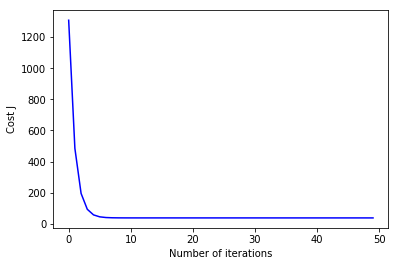

cost for 50 iterations :

 [1308.52602153  485.00631578  195.31351838   93.40637879   57.55708301
   44.94512719   40.50743337   38.94522418   38.39453513   38.1996747
   38.12998857   38.10433888   38.09418356   38.08948226   38.08670307
   38.08460353   38.08274658   38.08097846   38.07924506   38.07752736
   38.07581863   38.07411651   38.07242015   38.07072925   38.06904368
   38.06736339   38.06568836   38.06401856   38.06235398   38.06069459
   38.05904039   38.05739135   38.05574746   38.0541087    38.05247506
   38.05084652   38.04922307   38.04760468   38.04599135   38.04438306
   38.04277978   38.04118152   38.03958824   38.03799994   38.03641659
   38.0348382    38.03326472   38.03169617   38.03013251   38.02857373]


In [8]:
# Put your code here and show the result.
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

height = np.array([ 155.0, 146.0, 142.0, 150.0, 172.0, 161.0, 180.0, 130.0, 158.0, 161.0, 183.0, 158.0, 153.0, 164.0, 180.0, 154.0, 170.0, 148.0, 179.0, 144.0, 182.0, 161.0, 164.0, 156.0, 160.0, 163.0, 161.0, 165.0, 162.0, 144.0, 160.0, 162.0, 177.0, 166.0, 162.0, 165.0, 153.0, 185.0, 157.0, 168.0, 152.0, 173.0, 136.0, 169.0, 163.0, 142.0, 156.0, 152.0, 129.0, 162.0, 151.0, 186.0, 169.0, 161.0, 167.0, 136.0, 133.0, 192.0, 166.0, 168.0, 146.0, 127.0, 160.0, 161.0, 150.0, 149.0, 204.0, 170.0, 151.0, 164.0, 162.0, 161.0, 193.0, 156.0, 115.0, 161.0, 149.0, 165.0, 172.0, 173.0, 156.0, 167.0, 177.0, 137.0, 153.0, 166.0, 144.0, 165.0, 148.0, 177.0, 162.0, 150.0, 143.0, 161.0, 147.0, 177.0, 157.0, 170.0, 132.0, 173.0, 177.0, 179.0, 160.0, 164.0, 171.0, 140.0, 163.0, 136.0, 155.0, 174.0, 160.0, 133.0, 177.0, 159.0, 156.0, 166.0, 129.0, 123.0, 136.0, 148.0, 167.0, 158.0, 161.0, 134.0, 164.0, 156.0, 162.0, 147.0, 183.0, 169.0, 167.0, 193.0, 146.0, 178.0, 169.0, 169.0, 159.0, 140.0, 153.0, 164.0, 191.0, 173.0, 132.0, 164.0, 144.0, 154.0, 179.0, 177.0, 160.0, 187.0 ])
age = np.array([ 8.0, 51.0, 29.0, 27.0, 36.0, 30.0, 51.0, 50.0, 36.0, 32.0, 41.0, 18.0, 42.0, 38.0, 30.0, 28.0, 34.0, 45.0, 33.0, 24.0, 29.0, 52.0, 39.0, 47.0, 40.0, 38.0, 20.0, 40.0, 43.0, 23.0, 35.0, 35.0, 56.0, 39.0, 41.0, 24.0, 32.0, 32.0, 54.0, 33.0, 27.0, 19.0, 34.0, 35.0, 44.0, 44.0, 47.0, 32.0, 50.0, 35.0, 25.0, 39.0, 38.0, 40.0, 13.0, 48.0, 39.0, 31.0, 37.0, 44.0, 44.0, 44.0, 41.0, 39.0, 19.0, 38.0, 50.0, 31.0, 43.0, 38.0, 26.0, 39.0, 42.0, 38.0, 38.0, 32.0, 36.0, 35.0, 35.0, 39.0, 30.0, 34.0, 40.0, 46.0, 33.0, 36.0, 52.0, 41.0, 28.0, 45.0, 47.0, 9.0, 47.0, 43.0, 34.0, 36.0, 50.0, 43.0, 52.0, 30.0, 33.0, 34.0, 28.0, 49.0, 53.0, 21.0, 32.0, 50.0, 59.0, 19.0, 40.0, 30.0, 35.0, 35.0, 22.0, 51.0, 31.0, 41.0, 39.0, 40.0, 30.0, 45.0, 43.0, 34.0, 26.0, 28.0, 43.0, 30.0, 35.0, 47.0, 19.0, 61.0, 28.0, 39.0, 48.0, 30.0, 43.0, 28.0, 42.0, 58.0, 33.0, 24.0, 12.0, 34.0, 31.0, 36.0, 31.0, 21.0, 43.0, 33.0 ])
weight = np.array([ 47.0, 61.0, 55.0, 42.0, 65.0, 61.0, 67.0, 32.0, 60.0, 62.0, 69.0, 58.0, 65.0, 68.0, 74.0, 54.0, 65.0, 55.0, 70.0, 51.0, 74.0, 69.0, 66.0, 57.0, 51.0, 64.0, 55.0, 68.0, 64.0, 59.0, 57.0, 58.0, 74.0, 57.0, 64.0, 52.0, 48.0, 75.0, 61.0, 56.0, 53.0, 50.0, 49.0, 56.0, 61.0, 60.0, 67.0, 58.0, 53.0, 54.0, 49.0, 78.0, 59.0, 60.0, 66.0, 43.0, 43.0, 73.0, 70.0, 76.0, 61.0, 47.0, 61.0, 66.0, 50.0, 62.0, 89.0, 66.0, 59.0, 55.0, 60.0, 59.0, 78.0, 57.0, 31.0, 58.0, 52.0, 60.0, 64.0, 60.0, 58.0, 72.0, 69.0, 46.0, 54.0, 67.0, 65.0, 46.0, 56.0, 74.0, 56.0, 49.0, 53.0, 66.0, 57.0, 68.0, 64.0, 66.0, 45.0, 63.0, 64.0, 65.0, 57.0, 67.0, 69.0, 46.0, 60.0, 50.0, 57.0, 62.0, 51.0, 47.0, 74.0, 62.0, 52.0, 72.0, 43.0, 45.0, 48.0, 59.0, 66.0, 58.0, 67.0, 48.0, 65.0, 57.0, 64.0, 49.0, 78.0, 61.0, 59.0, 93.0, 42.0, 77.0, 63.0, 72.0, 57.0, 36.0, 53.0, 64.0, 73.0, 65.0, 38.0, 60.0, 54.0, 47.0, 65.0, 59.0, 54.0, 64.0 ])

Y = np.matrix(weight).T
X = np.matrix([height,age]).T
X = np.concatenate([np.ones([len(age),1]),X],1)

print('Batch Gradient Descent:')

# theta obtained with alpha = 0.0000001 is optimal.
alpha = 0.0000001
num_iters = 50
initial_theta = np.matrix([0, 0, 0]).transpose()


def CostFunction( Y_pred):
    m = 150
    J = (np.sum(np.square(Y_pred - Y)))/(m)
    return J

def gradient_descent(X, Y, theta, num_iters, alpha):
   
    J_history_batch = np.zeros(num_iters)
    
    for iter in range(num_iters):
    
        hypothesis = X * theta
        residual = (hypothesis - Y).transpose() * (hypothesis - Y)
        delta_intercept = np.sum((hypothesis - Y).transpose())
        delta_height = np.sum((hypothesis - Y).transpose() * X[:,1:2])
        delta_age = np.sum((hypothesis - Y).transpose() * X[:,2:])
        gradient = np.matrix([delta_intercept, delta_height, delta_age]).transpose()
        theta = theta - alpha * gradient
        
        Y_pred = np.dot(X, theta)
        
        J_history_batch[iter] = CostFunction( Y_pred)
          
    return (theta, J_history_batch, Y_pred)
    

theta, hist_batch, Y_pred = gradient_descent(X,Y,initial_theta, num_iters, alpha);


# Plot convergence graph
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(np.arange(len(hist_batch)),hist_batch ,'-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

print('cost for 50 iterations :\n\n' , hist_batch)


The cost function converges after step 13 with no considerable change in its value. in step 13 cost(MSE) is  38.09418356 and in 50th step it decreases to 38.02857373. So BGD converges at 13th step approximately.

## Problem 4

Implement stochastic gradient descent for the 2-variable model (predicting weight from height and age). Starting from (0,0,0), plot mean squared error as a function of iteration (one pass through the data set per iteration).



Stochastic Gradient Descent:


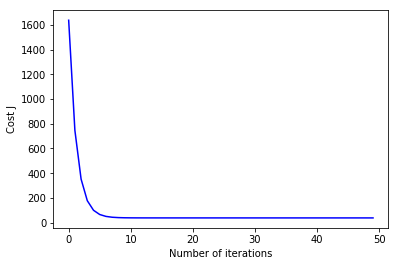

cost for 50 iterations :

 [1637.57453923  746.66300444  352.11006985  177.33702927   99.89219965
   65.55728716   50.32298508   43.55539475   40.54339571   39.19897045
   38.59611833   38.32379517   38.19929041   38.1412218    38.11322986
   38.09899705   38.09115214   38.08633368   38.08298815   38.08038425
   38.07816926   38.07616775   38.0742892    38.072485     38.07072793
   38.06900217   38.06729817   38.06561004   38.06393404   38.06226776
   38.06060964   38.05895865   38.05731411   38.05567556   38.05404268
   38.05241528   38.05079321   38.04917637   38.04756468   38.04595809
   38.04435656   38.04276006   38.04116856   38.03958204   38.03800048
   38.03642386   38.03485216   38.03328536   38.03172345   38.03016642]


In [51]:
# Put your code here and show the result.

def stochastic_gd(X, Y, theta, num_iters, alpha):
    
    print('\nStochastic Gradient Descent:')
    
    J_history_sto = np.zeros(num_iters)
    
    for iter in range(num_iters):
        for i in range(0,Y.size):
            X_i = X[i,:]
            Y_i = Y[i,:]
            hypothesis_i = X_i * theta
            residual = (hypothesis_i - Y_i).transpose() * (hypothesis_i - Y_i)
            delta_intercept = (hypothesis_i - Y_i).transpose()
            delta_height = (hypothesis_i - Y_i).transpose() * X_i[:,1:2]
            delta_age = (hypothesis_i - Y_i).transpose() * X_i[:,2:]
            gradient_array = np.array([[delta_intercept],[delta_height], [delta_age]])
            gradient = np.asmatrix(gradient_array).transpose()
            theta = theta - alpha * gradient
            
        Y_pred = np.dot(X, theta)
        
        J_history_sto[iter] = computeCost( Y_pred)
          
    
    return (theta, J_history_sto, Y_pred)
    

    
theta_sto, hist_sto, Y_pred_sto = stochastic_gd(X,Y,initial_theta, num_iters, alpha);


# Plot convergence graph
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(np.arange(len(hist_sto)),hist_sto ,'-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()
print('cost for 50 iterations :\n\n', hist_sto)

The cost function converges after step 16 with no considerable change in its value. In step 16 cost(MSE) is   38.09899705 and in 50th step it decreases to 38.03016642. So SGD converges at 16th step approximately.

## Turn it in

After you've finished, download this notebook as PDF and submit via Gradescope.

For PDF export, in Ubuntu, you may need to install some needed packages:

    sudo apt install pandoc texlive-xetex
